In [24]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import operator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn import mixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
import scipy.stats as stats

In [3]:
# Function goal is to determine the right number of clusters
# Runs algorithms with different numbers of clusters and calculates silhouette coefficient
# Returns the number of clusters that leads to the highest silhouette coefficient
def get_num_clust(feat_mat):
    silhouettes = {}
    for k in range(2,11):
        labels = clust_agg(feat_mat,k)
        avg_score = silhouette_score(feat_mat, labels)
        silhouettes[str(k)] = avg_score
    num_clust = int(max(silhouettes.items(), key=operator.itemgetter(1))[0])
    return num_clust

In [21]:
# Function goal is to determine the right number of clusters
# Runs algorithms with different numbers of clusters and calculates silhouette coefficient
# Returns the number of clusters that leads to the highest silhouette coefficient
def get_num_clust_Kmeans(feat_mat):
    silhouettes = {}
    for k in range(2,11):
        (labels, centers) = clust_Kmeans(feat_mat,k)
        avg_score = silhouette_score(feat_mat, labels)
        silhouettes[str(k)] = avg_score
    num_clust = int(max(silhouettes.items(), key=operator.itemgetter(1))[0])
    return num_clust

In [4]:
# Function to estimate the bandwidth for MeanShift Clustering
def get_bw(feat_mat):
    bw = estimate_bandwidth(feat_mat)
    return bw

In [5]:
# Function runs MeanShift Clustering on a given feature matrix with a specified bandwidth parameters
# Returns the label for each sample
def clust_MS(feat_mat, bw):
    ms = MeanShift(bandwidth=bw).fit(feat_mat)
    labels = ms.labels_
    centers = ms.cluster_centers_
    return (labels, centers)

In [11]:
# Function runs K-means on a given feature matrix using a specified number of clusters
# Returns the feature matrix, the labels for each data point, and the cluster centers
def clust_Kmeans(feat_mat, num_clust):
    kmeans = KMeans(init='random', n_clusters=num_clust, n_init=100)
    kmeans.fit(feat_mat)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    return (labels, centers)

In [12]:
# Function runs Agglomerative Clustering on a given deature matrix using a specified number of clusters
# Retruns the label for each sample
def clust_agg(feat_mat, num_clust):
    labels = AgglomerativeClustering(n_clusters=num_clust).fit_predict(feat_mat)
    return labels

In [6]:
# Plotting clusters based on 3 features for 3 clusters
def plot_Kmean_clusters_3D_3(data,labels,centers,xlab,ylab,zlab,title):
    # Changing size of figure and font size of axes' labels
    plt.rcParams.update({"figure.figsize":(7, 6)})
    plt.rcParams.update({"xtick.labelsize":10,"ytick.labelsize":10})
    
    fig = plt.figure()
    ax = Axes3D(fig)

    # Separating clusters and plotting individually
    # Currently assumes there are 2 clusters - will fix
    for i in range(0,len(data)):
        if labels[i] == 0:
            c1 = ax.scatter(data[i,0],data[i,1],data[i,2],c='b',marker='x',s=30)
        elif labels[i] == 1:
            c2 = ax.scatter(data[i,0],data[i,1],data[i,2],c='r',marker='o',s=30)
        elif labels[i] == 2:
            c3 = ax.scatter(data[i,0],data[i,1],data[i,2],c='g',marker='*',s=30)

    # Plotting cluster centers
    #c9 = ax.scatter(centers[:,0],centers[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');
    
    # Formatting figure and plotting
    ax.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'],fontsize=14)
    fig.suptitle(title, fontsize=20)
    ax.set_xlabel(xlab, fontsize=18)
    ax.set_ylabel(ylab, fontsize=18)
    ax.set_zlabel(zlab, fontsize=18)
    plt.show()

Sklearn number of clusters is 3
Scipy Scott's Factor number of clusters is 300
Scipy Silverman's Factor number of clusters is 312


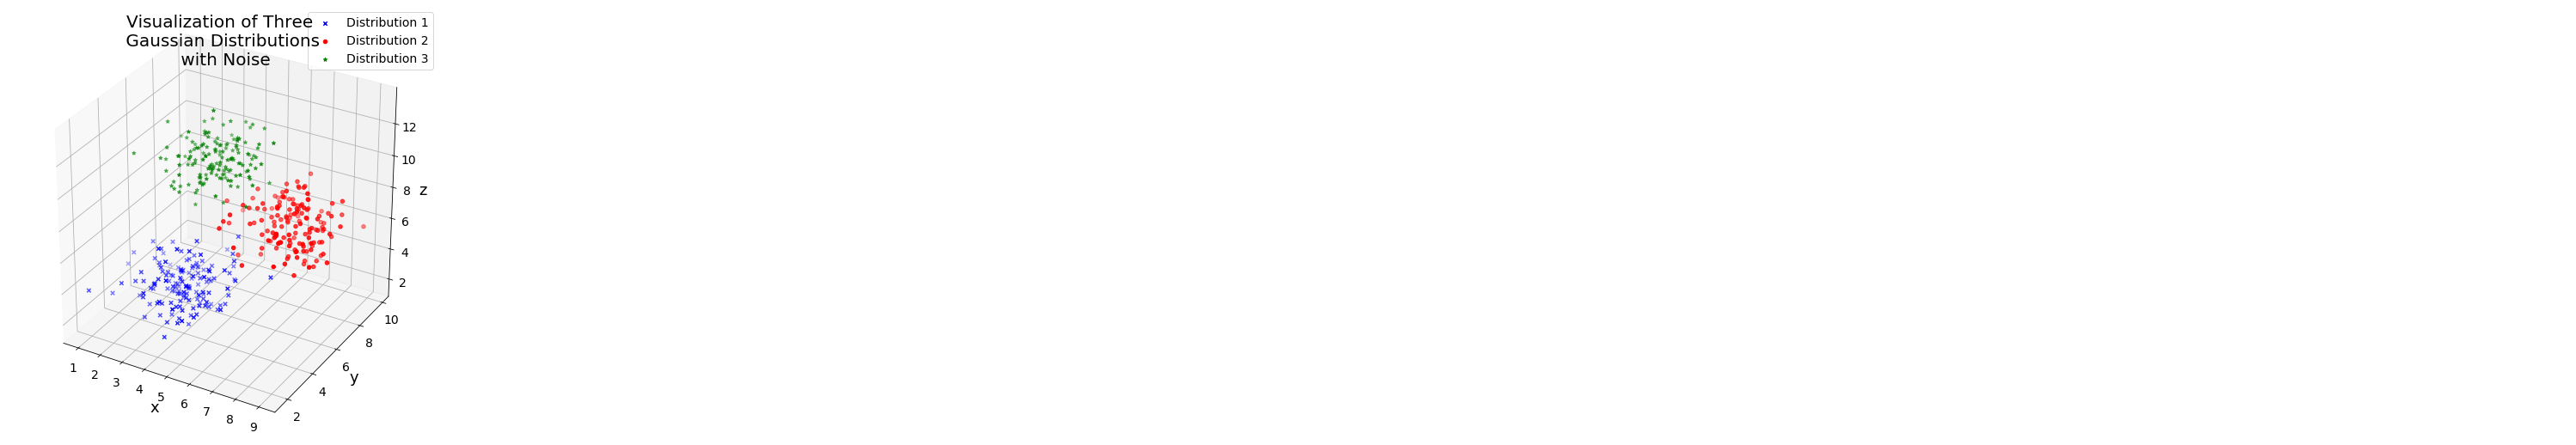

In [7]:
# Creating distributions to use to look at MeanShift bandwidth parameter and plotting

# Formatting figure
plt.rcParams.update({"figure.figsize":(7, 7)})
plt.rcParams.update({"xtick.labelsize":14,"ytick.labelsize":14})

# Making first 3D Gaussian and plotting
mean = [4, 4, 4]
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
a, b, c = np.random.multivariate_normal(mean, cov, 150).T
fig = plt.figure()
ax = Axes3D(fig)
c1 = ax.scatter(a,b,c,c='b',marker='x')
fig.suptitle("Visualization of Three \n Gaussian Distributions \n with Noise", fontsize=20)
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.set_zlabel("z", fontsize=18)

# Making second 3D Gaussian and plotting
mean = [7, 7, 7]
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
x, y, z = np.random.multivariate_normal(mean, cov, 150).T
c2 = ax.scatter(x,y,z,c='r',marker='o')

# Making second 3D Gaussian and plotting
mean = [4, 7, 10]
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
l, m, n = np.random.multivariate_normal(mean, cov, 150).T
c3 = ax.scatter(l,m,n,c='g',marker='*')

# Adding legend
ax.legend([c1, c2, c3], ['Distribution 1', 'Distribution 2', 'Distribution 3'], fontsize=14)

# Making a feature matrix from the distributions
e = np.concatenate([[a, x, l]]).reshape(1,450)
f = np.concatenate([[b, y, m]]).reshape(1,450)
g = np.concatenate([[c, z, n]]).reshape(1,450)
fm = np.concatenate([e,f,g]).transpose()

# Adding noise to all Gaussians
noise = np.random.uniform(.2, -.2, (450,3))
fm = fm + noise

# Using different methods for determining bandwidth

# Sklearn estimate bandwidth
bw = get_bw(fm)
(labels, centers) = clust_MS(fm, bw)
max_lab = 0
for num in labels:
    if num > max_lab:
        max_lab = num
numc = max_lab + 1
print("Sklearn number of clusters is " + str(numc))

# Scipy scott's rule
n, d = fm.shape
bw1 = pow(n, -1./(d+4))
(labels, centers) = clust_MS(fm, bw1)
max_lab = 0
for num in labels:
    if num > max_lab:
        max_lab = num
numc = max_lab + 1
print("Scipy Scott's Factor number of clusters is " + str(numc))

# Scipy silverman's rule
n, d = fm.shape
bw2 = pow(n*(d+2.0)/4.0, -1./(d+4))
(labels, centers) = clust_MS(fm, bw2)
max_lab = 0
for num in labels:
    if num > max_lab:
        max_lab = num
numc = max_lab + 1
print("Scipy Silverman's Factor number of clusters is " + str(numc))

# Trying random values

# Plotting clusters
#fig = plt.figure()
#plot_Kmean_clusters_3D_3(fm,labels,centers,'x','y','z','Clusters')
#plt.show()

In [8]:
print(bw)
print(bw1)
print(bw2)

3.14988253178005
0.41780115947141516
0.40469268399339864


In [15]:
bw_t = 3.27
(labels, centers) = clust_MS(fm, bw_t)
max_lab = 0
for num in labels:
    if num > max_lab:
        max_lab = num
numc = max_lab + 1
print("Scipy Silverman's Factor number of clusters is " + str(numc))
print("Changing the bandwidth by small amounts when it was originally wrong made the correct number of clusters")

Scipy Silverman's Factor number of clusters is 2
Changing the bandwidth by small amounts when it was originally wrong made the correct number of clusters


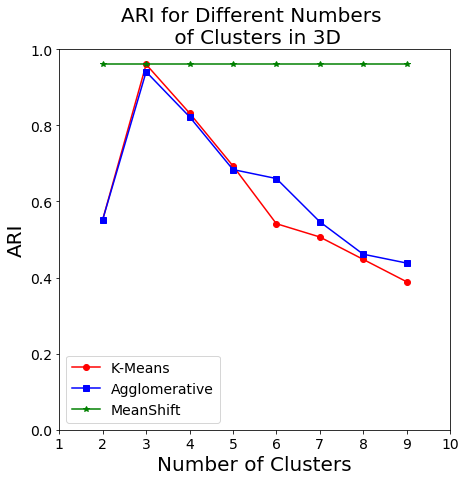

In [18]:
# Comparing clustering algorithms

true_labels = np.concatenate((np.zeros(150), np.ones(150), np.full(150, 2)))
ari_km = np.empty([1, 8])
ari_agg = np.empty([1, 8])
ari_ms = np.empty([1, 8])
for k in range(2, 10):
        (labels_km, centers_km) = clust_Kmeans(fm,k)
        labels_agg = clust_agg(fm, k)
        bw = get_bw(fm)
        (labels_ms, centers_ms) = clust_MS(fm,bw)
        ari_km[0,k-2] = adjusted_rand_score(true_labels, labels_km)
        ari_agg[0,k-2] = adjusted_rand_score(true_labels, labels_agg)
        ari_ms[0,k-2] = adjusted_rand_score(true_labels, labels_ms)
        
# Plotting ARI for 3D
plt.plot([2,3,4,5,6,7,8,9], ari_km[0,:], 'ro', label='K-Means', ls='-')
plt.plot([2,3,4,5,6,7,8,9], ari_agg[0,:], 'bs', label='Agglomerative', ls='-')
plt.plot([2,3,4,5,6,7,8,9], ari_ms[0,:], 'g*', label='MeanShift', ls='-')
plt.axis([1, 10, 0, 1])
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('ARI', fontsize=20)
plt.legend(fontsize=14)
plt.title('ARI for Different Numbers \n of Clusters in 3D', fontsize=20)
plt.show()

In [39]:
ari_ms

array([[0.96042579, 0.96042579, 0.96042579, 0.96042579, 0.96042579,
        0.96042579, 0.96042579, 0.96042579]])

In [22]:
# Will Silhouette Coefficient get the same answer when choosing the number of clusters as the estimate bandwidth 
# parameter?
k_agg = get_num_clust(fm)
print(k_agg)
k_km = get_num_clust_Kmeans(fm)
print(k_km)

3
3


In [34]:
# Choosing a number of clusters with BIC and AIC

lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(fm)
        bic.append(gmm.bic(fm))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)


lowest_aic = np.infty
aic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(fm)
        aic.append(gmm.aic(fm))
        if bic[-1] < lowest_bic:
            lowest_aic = aic[-1]
            best_gmm = gmm

aic = np.array(aic)

In [33]:
bic

array([5834.61174888, 5339.68149207, 4914.45214381, 4938.45945221,
       4964.21269538, 4988.43165827, 5018.65514432, 5037.3972447 ,
       5068.12223849, 5463.44101537, 5172.14114905, 4931.78505563,
       4951.08994542, 4970.91364853, 4985.74317828, 5014.60692607,
       5026.86620516, 5051.64819096, 5752.24795922, 5260.64339462,
       4948.6621803 , 4977.43133921, 5007.03368094, 5041.86707979,
       5080.89082654, 5112.30192231, 5140.36205696, 5463.44101537,
       5073.46439825, 4993.46727365, 5046.7271245 , 5097.13783862,
       5146.59778922, 5185.80238352, 5250.56765937, 5283.20894222])

In [31]:
print(np.argmin(bic))
print(np.argwhere(bic == np.min(bic)))

2
[[2]]


In [35]:
aic

array([5818.17475855, 5302.69826383, 4856.92267765, 4862.42861436,
       4870.41427686, 4865.60335782, 4870.80193367, 4876.23071117,
       4878.1257347 , 5426.45778713, 5118.72093048, 4861.92784672,
       4866.41020088, 4862.51194511, 4874.89055807, 4883.68880134,
       4883.70919949, 4886.22265725, 5727.59247372, 5207.22317605,
       4866.47428017, 4877.21142367, 4881.63953409, 4879.03524396,
       4877.83488376, 4888.80156997, 4907.09960037, 5426.45778713,
       4995.38869417, 4874.27706052, 4879.00045893, 4891.34131831,
       4894.58374239, 4910.25645566, 4911.31742771, 4919.28214822])

In [36]:
print(np.argmin(aic))
print(np.argwhere(aic == np.min(aic)))

2
[[2]]


In [ ]:
for k in range(2, 10):
        (labels_km, centers_km) = clust_Kmeans(fm,k)
        labels_agg = clust_agg(fm, k)
        bw = get_bw(fm)
        (labels_ms, centers_ms) = clust_MS(fm,bw)
        ari_km[0,k-2] = adjusted_rand_score(true_labels, labels_km)
        ari_agg[0,k-2] = adjusted_rand_score(true_labels, labels_agg)
        ari_ms[0,k-2] = adjusted_rand_score(true_labels, labels_ms)